# Logistic regression(binary classification)
- 지도학습에서 데이터의 label이 0혹은 1로 설정
- 이런 데이터는 기존의 선형회귀방식으로는 학습하고 prediction하는게 불가능
- 이런 데이터는 어떻게 학습하고 예측하면 좋을까?
- 가설을 바꿔야해요
- H = XW + b (다중선형회귀에서 사용한 가설) => 직선
- 직선이 아닌 0에서 1사이의 값을 가지는 함수로 가설을 표현

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## sigmoid함수
- 를 이용해서 표현
- 가설을 변화시켜야 한다
- 가설이 변경됐기 때문에 해당가설을 이용한 cost함수를 이용하면 local minima를 찾게 될 여지가 있게 된다.
- 따라서 cost 함수고 변경해야한다
- cost = -ylog(H) - (1 - y)log(1 - H) => 수학식을 이용해서 cost함수를 사용
- 사용할 데이터는 
-    공부시간         어학연수기간     시험성적
-      1                   1              0(Fail)
-      2                   0              0(Fail)
-      5                   1              0(Fail)
-      2                   3              1(Fail)
-      3                   3              1(Fail)
-      8                   1              1(Fail)
-      3                   0              1(Fail)

In [ ]:
-    공부시간         어학연수기간     시험성적
-      1                   1              0(Fail)
-      2                   0              0(Fail)
-      5                   1              0(Fail)
-      2                   3              1(Fail)
-      3                   3              1(Fail)
-      8                   1              1(Fail)
-      3                   0              1(Fail)

[-1.00000000e+01 -9.90000000e+00 -9.80000000e+00 -9.70000000e+00
 -9.60000000e+00 -9.50000000e+00 -9.40000000e+00 -9.30000000e+00
 -9.20000000e+00 -9.10000000e+00 -9.00000000e+00 -8.90000000e+00
 -8.80000000e+00 -8.70000000e+00 -8.60000000e+00 -8.50000000e+00
 -8.40000000e+00 -8.30000000e+00 -8.20000000e+00 -8.10000000e+00
 -8.00000000e+00 -7.90000000e+00 -7.80000000e+00 -7.70000000e+00
 -7.60000000e+00 -7.50000000e+00 -7.40000000e+00 -7.30000000e+00
 -7.20000000e+00 -7.10000000e+00 -7.00000000e+00 -6.90000000e+00
 -6.80000000e+00 -6.70000000e+00 -6.60000000e+00 -6.50000000e+00
 -6.40000000e+00 -6.30000000e+00 -6.20000000e+00 -6.10000000e+00
 -6.00000000e+00 -5.90000000e+00 -5.80000000e+00 -5.70000000e+00
 -5.60000000e+00 -5.50000000e+00 -5.40000000e+00 -5.30000000e+00
 -5.20000000e+00 -5.10000000e+00 -5.00000000e+00 -4.90000000e+00
 -4.80000000e+00 -4.70000000e+00 -4.60000000e+00 -4.50000000e+00
 -4.40000000e+00 -4.30000000e+00 -4.20000000e+00 -4.10000000e+00
 -4.00000000e+00 -3.90000

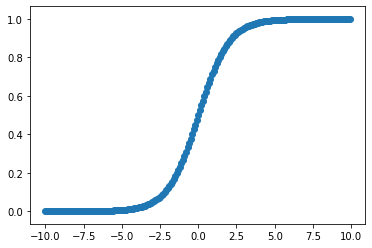

In [4]:
x = np.arange(-10,10, 0.1)
y = 1/ (1+np.exp(-x))

plt.scatter(x,y)

In [25]:
import tensorflow as tf

# training data set
x_data = [[1,1],
          [2,0],
          [5,1],
          [2,3],
          [3,3],
          [8,1],
          [10,1]]
y_data = [[0],[0],[0],[1],[1],[1],[1]]

# placeholdr
X = tf.placeholder(shape = [None,2], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)   # 1 /(1 +ep)   sidgmoid를 이용해서 곡선으로 표현

# cost function (일반적으로 tf에서 제공하는 함수를 이용)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits= logit,
                                                               labels= Y))
# logistic의 cost만들어주는 함수(tensor)
#tain
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # global variable 초기화

# 학습
for step in range(3000):
    _,cost_val = sess.run([train,cost],feed_dict = {X : x_data,
                                                     Y : y_data})
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))

# predict
result = sess.run(H, feed_dict = {X : [[7,1]]})
print(result)  # 시험에 통과했어요
if result>0.5:
    print("시험에 통과 : {}".format(result))
else:
    print("시험에 떨어졌어요 : {}".foramt(result))

cost값은 : 1.1658686399459839
cost값은 : 0.29762905836105347
cost값은 : 0.2075405865907669
cost값은 : 0.16813209652900696
cost값은 : 0.1446276754140854
cost값은 : 0.12840351462364197
cost값은 : 0.11623722314834595
cost값은 : 0.10662196576595306
cost값은 : 0.0987449362874031
cost값은 : 0.092122383415699
[[0.7164849]]
시험에 통과 : [[0.7164849]]


## 대학원 입학시험 예측
- 데이터는 admission.csv 이용
- logistic regression을 수행한 후 prediction을 진행

In [87]:
import tensorflow as tf
import pandas as pd
df = pd.read_csv("./data/admission.csv")


In [88]:
df = df.dropna(how = "any", inplace = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x13ae27a55c0>,
 'caps': [<matplotlib.lines.Line2D at 0x13ae27a5c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x13ae27a52b0>],
 'medians': [<matplotlib.lines.Line2D at 0x13ae27b2320>],
 'fliers': [<matplotlib.lines.Line2D at 0x13ae27b2668>],
 'means': []}

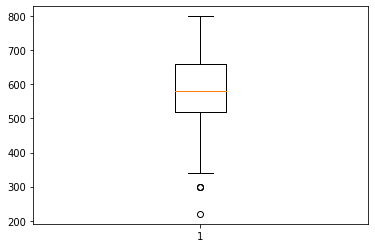

In [89]:
plt.boxplot(df["gre"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13ae2809470>,
 'caps': [<matplotlib.lines.Line2D at 0x13ae2809b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x13ae2809320>],
 'medians': [<matplotlib.lines.Line2D at 0x13ae2812240>],
 'fliers': [<matplotlib.lines.Line2D at 0x13ae2812588>],
 'means': []}

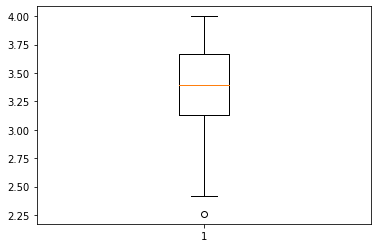

In [90]:
plt.boxplot(df["gpa"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13ae28649e8>,
 'caps': [<matplotlib.lines.Line2D at 0x13ae2870128>,
 'boxes': [<matplotlib.lines.Line2D at 0x13ae2864898>],
 'medians': [<matplotlib.lines.Line2D at 0x13ae28707b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x13ae2870b00>],
 'means': []}

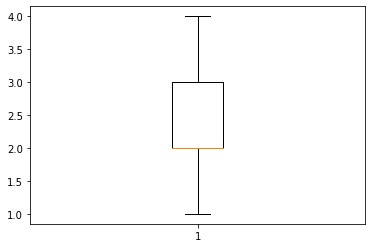

In [91]:
plt.boxplot(df["rank"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13ae28c6a20>,
 'caps': [<matplotlib.lines.Line2D at 0x13ae28d2160>,
 'boxes': [<matplotlib.lines.Line2D at 0x13ae28c68d0>],
 'medians': [<matplotlib.lines.Line2D at 0x13ae28d27f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13ae28d2b38>],
 'means': []}

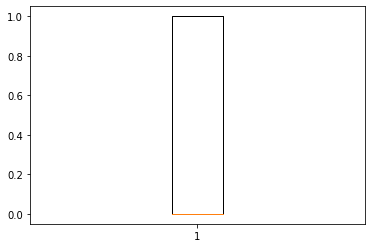

In [92]:
plt.boxplot(df["admit"])

In [93]:
q1,q3 = np.percentile(df["gre"],[25,75])
# 두개의 값 알기 위해 -> [] list 써줌 
iqr = q3 - q1
lower = q1 - iqr * 1.5   # 131.125가 상위 이상치를 처리하기 위한 경계값
print(lower)
mask = df["gre"] < lower    # boolean mask를 생성
df = df.loc[~mask]
display(df)
print(df.shape)

310.0


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


(396, 4)


In [94]:
q1,q3 = np.percentile(df["gpa"],[25,75])
# 두개의 값 알기 위해 -> [] list 써줌 
iqr = q3 - q1
lower = q1 - iqr * 1.5   # 131.125가 상위 이상치를 처리하기 위한 경계값
print(lower)
mask = df["gpa"] < lower    # boolean mask를 생성
df = df.loc[~mask]
display(df)
print(df.shape)

2.32


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


(395, 4)


In [95]:
x_data = df[["gre","gpa","rank"]].values
print(x_data)
y_data = df["admit"].values.reshape(-1,1)
print(y_data)

[[380.     3.61   3.  ]
 [660.     3.67   3.  ]
 [800.     4.     1.  ]
 ...
 [460.     2.63   2.  ]
 [700.     3.65   2.  ]
 [600.     3.89   3.  ]]
[[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [74]:
df["gre_Norm"] = (df["gre"] - df["gre"].min()) / (df["gre"].max() - df["gre"].min())
df["gpa_Norm"] = (df["gpa"] - df["gpa"].min()) / (df["gpa"].max() - df["gpa"].min())
df["rank_Norm"] = (df["rank"] - df["rank"].min()) / (df["rank"].max() - df["rank"].min())
df["admit_Norm"] = (df["admit"] - df["admit"].min()) / (df["admit"].max() - df["admit"].min())
df.head()

,admit,gre,gpa,rank,gre_Norm,gpa_Norm,rank_Norm,admit_Norm
0,0,380,3.61,3,0.086957,0.753165,0.666667,0.0
1,1,660,3.67,3,0.695652,0.791139,0.666667,1.0
2,1,800,4.00,1,1.000000,1.000000,0.000000,1.0
3,1,640,3.19,4,0.652174,0.487342,1.000000,1.0
4,0,520,2.93,4,0.391304,0.322785,1.000000,0.0


In [97]:
# placeholdr
X = tf.placeholder(shape = [None,3], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)   # 1 /(1 +ep)   sidgmoid를 이용해서 곡선으로 표현

# cost function (일반적으로 tf에서 제공하는 함수를 이용)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits= logit,
                                                               labels= Y))
# logistic의 cost만들어주는 함수(tensor)
#tain
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0000001)
train = optimizer.minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # global variable 초기화

# 학습
for step in range(3000):
    _,cost_val = sess.run([train,cost],feed_dict = {X : x_data,
                                                     Y : y_data})
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))

        
# predict
result = sess.run(H, feed_dict = {X : [[380,3.61,3]]})
print(result)  # 시험에 통과했어요
if result>0.5:
    print("시험에 통과 : {}".format(result))
else:
    print("시험에 떨어졌어요 : {}".format(result))

cost값은 : 56.683074951171875
cost값은 : 55.504451751708984
cost값은 : 54.3258171081543
cost값은 : 53.14718246459961
cost값은 : 51.968563079833984
cost값은 : 50.7899284362793
cost값은 : 49.611305236816406
cost값은 : 48.432674407958984
cost값은 : 47.25404357910156
cost값은 : 46.075416564941406
[[0.]]
시험에 떨어졌어요 : [[0.]]


In [97]:
# placeholdr
X = tf.placeholder(shape = [None,3], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)   # 1 /(1 +ep)   sidgmoid를 이용해서 곡선으로 표현

# cost function (일반적으로 tf에서 제공하는 함수를 이용)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits= logit,
                                                               labels= Y))
# logistic의 cost만들어주는 함수(tensor)
#tain
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0000001)
train = optimizer.minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # global variable 초기화

# 학습
for step in range(3000):
    _,cost_val = sess.run([train,cost],feed_dict = {X : x_data,
                                                     Y : y_data})
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))

        
# predict
result = sess.run(H, feed_dict = {X : [[380,3.61,3]]})
print(result)  # 시험에 통과했어요
if result>0.5:
    print("시험에 통과 : {}".format(result))
else:
    print("시험에 떨어졌어요 : {}".format(result))

cost값은 : 56.683074951171875
cost값은 : 55.504451751708984
cost값은 : 54.3258171081543
cost값은 : 53.14718246459961
cost값은 : 51.968563079833984
cost값은 : 50.7899284362793
cost값은 : 49.611305236816406
cost값은 : 48.432674407958984
cost값은 : 47.25404357910156
cost값은 : 46.075416564941406
[[0.]]
시험에 떨어졌어요 : [[0.]]


In [78]:
from sklearn import linear_model
import numpy as np
import pandas as pd

df = pd.read_csv("./data/admission.csv")
df = df[["admit","gre","gpa","rank"]]

# 결측치 제거
df = df.dropna(how = "any", inplace = False)
# 이상치 제거
q1,q3 = np.percentile(df["gre"],[25,75])
# 두개의 값 알기 위해 -> [] list 써줌 
iqr = q3 - q1
lower = q1 - iqr * 1.5 
mask = df["gre"] < lower   
df = df.loc[~mask]
display(df)
print(df.shape)
q1,q3 = np.percentile(df["gpa"],[25,75])

iqr = q3 - q1
lower = q1 - iqr * 1.5 
mask = df["gpa"] < lower    
df = df.loc[~mask]
display(df)
print(df.shape)


# machine learning
X = df[["gre","gpa","rank"]]
Y = df["admit"]

lm = linear_model.LinearRegression()
# 선형회귀 모델 틀을 만들거야
lm.fit(X,Y)

prediction = lm.predict([[380,3.61,3]])
print("예측값은 : {}".format(prediction))

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


(396, 4)


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


(395, 4)
예측값은 : [0.19255488]


In [103]:
import tensorflow as tf
import pandas as pd
df = pd.read_csv("./data/admission.csv")

df = df.dropna(how = "any", inplace = False)

q1,q3 = np.percentile(df["gre"],[25,75])
# 두개의 값 알기 위해 -> [] list 써줌 
iqr = q3 - q1
lower = q1 - iqr * 1.5   # 131.125가 상위 이상치를 처리하기 위한 경계값

mask = df["gre"] < lower    # boolean mask를 생성
df = df.loc[~mask]



q1,q3 = np.percentile(df["gpa"],[25,75])
# 두개의 값 알기 위해 -> [] list 써줌 
iqr = q3 - q1
lower = q1 - iqr * 1.5   # 131.125가 상위 이상치를 처리하기 위한 경계값

mask = df["gpa"] < lower    # boolean mask를 생성
df = df.loc[~mask]


x_data = df[["gre","gpa","rank"]].values

y_data = df["admit"].values.reshape(-1,1)


# placeholdr
X = tf.placeholder(shape = [None,3], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)   # 1 /(1 +ep)   sidgmoid를 이용해서 곡선으로 표현

# cost function (일반적으로 tf에서 제공하는 함수를 이용)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits= logit,
                                                               labels= Y))
# logistic의 cost만들어주는 함수(tensor)
#tain
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.000001)
train = optimizer.minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # global variable 초기화

# 학습
for step in range(30000):
    _,cost_val = sess.run([train,cost],feed_dict = {X : x_data,
                                                     Y : y_data})
    if step % 3000 == 0:
        print("cost값은 : {}".format(cost_val))

        
# predict
result = sess.run(H, feed_dict = {X : [[380,3.61,1]]})
print(result)  # 시험에 통과했어요
if result>0.5:
    print("시험에 통과 : {}".format(result))
else:
    print("시험에 떨어졌어요 : {}".format(result))

cost값은 : 60.0262451171875
cost값은 : 0.699496328830719
cost값은 : 0.6993707418441772
cost값은 : 0.6992453932762146
cost값은 : 0.6991201043128967
cost값은 : 0.6989948749542236
cost값은 : 0.6988697648048401
cost값은 : 0.6987447142601013
cost값은 : 0.6986196637153625
cost값은 : 0.6984949111938477
[[0.08887485]]
시험에 떨어졌어요 : [[0.08887485]]


### 정확도 측정(accuracy)
=> 95% 이상, 98% 이상이여야 실생활에서 응용가능

In [104]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [110]:
# 1. data loading
df = pd.read_csv("./data/admission.csv")
display(df.head())
display(df.corr())
# 상관계수를 이용해서 확인해봤더니
# rank값을 조절해야 할 듯 싶어요! (음의 상관관계)
# rank만 역방향이니 순방향으로 다시 잡아야해 (4 ->1, 3->2, 2->3, 1->4)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


In [128]:
def change_rank(k):
    if k == 4:
        return 1
    elif k == 3:
        return 2
    elif k == 2:
        return 3
    elif k == 1:
        return 4

def process_outlier(tmp_df,tmp):
    q1,q3 = np.percentile(tmp,[25,75])
    iqr = q3 - q1
    upper = q3 + iqr * 1.5
    lower = q1 - iqr * 1.5
    upper_mask = tmp > upper
    lower_mask = tmp < lower
    
    result_mask = upper_mask | lower_mask
    return tmp_df[~result_mask]

df["rank"] = df["rank"].apply(lambda x: change_rank(x)) 
# lambda 특정 컬럼에 대한 요소를 하나하나씩 추출해서가져옴
df.head()

# 결측치 처리(결측치는 존재하지 않아요)
df.isnull().sum()

# 이상치 처리
df = process_outlier(df,df["gre"])
df = process_outlier(df,df["gpa"])
df.shape   # (400,4) => (395,4)

################################ 전처리 ###########################################

# machine learning
x_data = df[["gre","gpa","rank"]].values  # numpy array로 빠짐
x_data = MinMaxScaler().fit_transform(x_data)

y_data = df["admit"].values.reshape(-1,1)

# placeholder
X = tf.placeholder(shape = [None,3], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                             labels = Y))

# train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)
     
# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # global variable 초기화

# 학습
for step in range(30000):
    _,cost_val = sess.run([train,cost],feed_dict = {X : x_data,
                                                     Y : y_data})
    if step % 3000 == 0:
        print("cost값은 : {}".format(cost_val))  

## 정확도를 측정해보자(Accuracy)
# test data set이 없다
# train data set을 test data set으로 사용

# predict한 결과를 알아오자
# 특정한 X값을 => training data set 을 이용
# 특정한 X입력에 대해서 1과 0으로 만들어진 예측값
predict = tf.cast(H > 0.5, dtype = tf.float32)   
correct = tf.equal(predict,Y)   # True,False,True,True
                                #   1    0    1    1
# T,F값을 실수값으로 바꿈 cast함
# 학습결과가 잘 되니 예측값이 원본데이터의 값이 된다
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 : {}".format(sess.run(accuracy, feed_dict={X : x_data,
                                                         Y : y_data})))

# 모델의 정확도가 70%이면 사용할 수 없는 모델
# training data set의 70%를 학습에 이용
# training data set의 30%를 평가에 이용

# prediction (예측)

cost값은 : 0.6361314654350281
cost값은 : 0.5761398077011108
cost값은 : 0.5760533809661865
cost값은 : 0.576052188873291
cost값은 : 0.5760520696640015
cost값은 : 0.5760520696640015
cost값은 : 0.5760520696640015
cost값은 : 0.5760520696640015
cost값은 : 0.5760520696640015
cost값은 : 0.5760520696640015
정확도 : 0.703797459602356


In [131]:
# 1. data loading
df = pd.read_csv("./data/titanic/train.csv")
display(df.head())


display(df.corr())
df["Age"].max()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


80.0